In [1]:
import numpy as np 
import pandas as pd

## instance info

In [2]:
# file_name = "/home/jxxiong/A-xjx/rhSCUC-main/results/instance_info.txt"
# df = pd.read_csv(file_name, sep=" ", header=None)
# df.columns = ["instance_name", "num_bus", "num_gen", "num_line", "num_cont"]
# df["num_bus"] = df["num_bus"].apply(lambda x: "{:,}".format(int(x)))
# df["num_gen"] = df["num_gen"].apply(lambda x: "{:,}".format(int(x)))
# df["num_line"] = df["num_line"].apply(lambda x: "{:,}".format(int(x)))
# df["num_cont"] = df["num_cont"].apply(lambda x: "{:,}".format(int(x)))
# df.to_latex(
#     "instance_info.tex",
#     index=False,
#     escape=False,
#     column_format="lllll",
#     header=["Instance", "Buses", "Generators", "Lines", "Contingencies"],
#     caption="Size of selected instances",
#     label="tab:instance_info",
# )

## Results

In [3]:
result_dir = "/data1/jxxiong/ucRH/"
nthreads = 4
threads = 4
file_name_rh = f"res_an_threads_{threads}_nthreads_{nthreads}.txt"
file_name_td = f"res_td_threads_{threads}_nthreads_{nthreads}.txt"
file_name_uc = f"res_uc_threads_{threads}_nthreads_{nthreads}.txt"
file_name_no_cb = f"res_an_no_cb_threads_{threads}_nthreads_{nthreads}.txt"
file_name_full_cb = f"res_full_cb_threads_{threads}_nthreads_{nthreads}.txt"

In [4]:
def read_result(file_name, result_dir=result_dir):
    # read the txt file into a pandas DataFrame
    df = pd.read_csv(result_dir+file_name, sep=" ", header=None, skiprows=1)

    # rename the columns
    df.columns = ['instance', 'method', 'time', 'obj', 'status']
    # for entries in 'method', only keep split('_')[0]
    df['method'] = df['method'].apply(lambda x: x.split('_')[0])
    
    # if "rh" in df['method], remove the row
    df = df[~df['method'].str.contains("rh")]
    # transform 'time' column to int by rounding
    df['time'] = df['time'].apply(lambda x: int(round(float(x))))
    df['obj'] = df['obj'] / 1e7
    
    return df

In [90]:
df_rh = read_result(file_name_rh)

# pivot the DataFrame to create a new DataFrame with instances as rows and methods as columns
df_rh_time = df_rh.pivot(index='instance', columns='method', values='time')
# reset the index to make 'instance' a column again
df_rh_time.reset_index(inplace=True)
# rename the columns to remove the multi-level index
df_rh_time.columns.name = None
# rename the columns to make them more descriptive
df_rh_time.columns = ['instance'] + [col.replace(' ', '_') for col in df_rh_time.columns[1:]]
df_rh_time = df_rh_time[['instance', 'start', 'improve']]
df_rh_time.set_index('instance', inplace=True)
df_rh_time.columns = ['start_time', 'improve_time']
df_rh_time['total_time'] = df_rh_time['start_time'] + df_rh_time['improve_time']
df_rh_time


,start_time,improve_time,total_time
instance,,,
case1354pegase,13,11,24
case13659pegase,305,342,647
case1888rte,29,24,53
case1951rte,20,14,34
case2383wp,9,15,24
case2736sp,9,13,22
case2737sop,7,8,15
case2746wop,12,20,32
case2746wp,10,13,23


In [91]:
df_rh_obj = df_rh.pivot(index='instance', columns='method', values='obj')
# reset the index to make 'instance' a column again
df_rh_obj.reset_index(inplace=True)
# rename the columns to remove the multi-level index
df_rh_obj.columns.name = None
# rename the columns to make them more descriptive
df_rh_obj.columns = ['instance'] + [col.replace(' ', '_') for col in df_rh_obj.columns[1:]]
df_rh_obj = df_rh_obj[['instance', 'start', 'improve']]
df_rh_obj.set_index('instance', inplace=True)
df_rh_obj.columns = ['start_obj', 'improve_obj']
df_rh_obj

,start_obj,improve_obj
instance,,
case1354pegase,1.587104,1.584653
case13659pegase,26.733799,26.680619
case1888rte,2.356147,2.350612
case1951rte,2.504985,2.504903
case2383wp,1.374566,1.373248
case2736sp,0.971862,0.966463
case2737sop,0.858951,0.851754
case2746wop,0.871342,0.861115
case2746wp,0.983901,0.971565


In [92]:
# merge the two DataFrames on the 'instance' column
df_rh = pd.merge(df_rh_time, df_rh_obj, left_index=True, right_index=True)
# df_result.reset_index(inplace=True)
df_rh = df_rh[['start_time', 'start_obj', 'improve_time', 'improve_obj', 'total_time']]
df_rh

,start_time,start_obj,improve_time,improve_obj,total_time
instance,,,,,
case1354pegase,13,1.587104,11,1.584653,24
case13659pegase,305,26.733799,342,26.680619,647
case1888rte,29,2.356147,24,2.350612,53
case1951rte,20,2.504985,14,2.504903,34
case2383wp,9,1.374566,15,1.373248,24
case2736sp,9,0.971862,13,0.966463,22
case2737sop,7,0.858951,8,0.851754,15
case2746wop,12,0.871342,20,0.861115,32
case2746wp,10,0.983901,13,0.971565,23


In [93]:
df_td = read_result(file_name_td)
df_td.set_index('instance', inplace=True)
df_td = df_td[['time', 'obj']]
df_td.columns = ['td_time', 'td_obj']
df_td

,td_time,td_obj
instance,,
case1354pegase,16,1.615070
case2737sop,19,0.893362
case2736sp,21,0.993996
case1888rte,30,2.390904
case2383wp,23,1.380347
case1951rte,21,2.529514
case2746wop,0,0.000000
case2746wp,20,1.001695
case3120sp,39,1.211530


In [94]:
df_uc = read_result(file_name_uc)
df_uc.set_index('instance', inplace=True)
df_uc = df_uc[~df_uc['method'].str.contains("improve")]
df_uc = df_uc[['time', 'obj']]
df_uc.columns = ['uc_time', 'uc_obj']
df_uc.head()

,uc_time,uc_obj
instance,,
case1354pegase,26,1.575281
case2737sop,11,0.846974
case2736sp,14,0.961879
case1888rte,126,2.345385
case2383wp,11,1.368804


### combine the three results

In [95]:
results = pd.merge(df_td, df_uc, left_index=True, right_index=True)
results = pd.merge(results, df_rh, left_index=True, right_index=True)
results['gap'] = (results['improve_obj'] - results['uc_obj']) / results['uc_obj'] * 100
# transform 'gap' column to percentage
results['gap'] = results['gap'].apply(lambda x: "{:.2f}\%".format(x))
# results['time_improvement_td'] = (results['td_time'] - results['total_time']) / results['td_time'] * 100
# results['time_improvement_uc'] = (results['uc_time'] - results['total_time']) / results['uc_time'] * 100
# for the 'time' columns, add ',' for each three digits
results['td_time'] = results['td_time'].apply(lambda x: "{:,}".format(int(x)))
results['uc_time'] = results['uc_time'].apply(lambda x: "{:,}".format(int(x)))
results['start_time'] = results['start_time'].apply(lambda x: "{:,}".format(int(x)))
results['improve_time'] = results['improve_time'].apply(lambda x: "{:,}".format(int(x)))
results['total_time'] = results['total_time'].apply(lambda x: "{:,}".format(int(x)))
# replace all entries with value 0.0 with '-'
results = results.replace("0", '-')
results = results.replace(0.0, '-')
results.to_latex(f"results_{nthreads}.tex", index=True, float_format="%.3f", escape=False)
results


,td_time,td_obj,uc_time,uc_obj,start_time,start_obj,improve_time,improve_obj,total_time,gap
instance,,,,,,,,,,
case1354pegase,16,1.61507,26,1.575281,13,1.587104,11,1.584653,24,0.59\%
case2737sop,19,0.893362,11,0.846974,7,0.858951,8,0.851754,15,0.56\%
case2736sp,21,0.993996,14,0.961879,9,0.971862,13,0.966463,22,0.48\%
case1888rte,30,2.390904,126,2.345385,29,2.356147,24,2.350612,53,0.22\%
case2383wp,23,1.380347,11,1.368804,9,1.374566,15,1.373248,24,0.32\%
case1951rte,21,2.529514,225,2.494229,20,2.504985,14,2.504903,34,0.43\%
case2746wop,-,-,95,0.853329,12,0.871342,20,0.861115,32,0.91\%
case2746wp,20,1.001695,15,0.964916,10,0.983901,13,0.971565,23,0.69\%
case3120sp,39,1.21153,71,1.176738,30,1.190270,30,1.187242,60,0.89\%


In [96]:
print(len(results))
assert len(results) == 20

18


AssertionError: 

## alblation - callback

In [121]:
file_name_full_cb

'res_full_cb_threads_4_nthreads_4.txt'

In [22]:
file_name_full_cb_1 = "res_full_cb_threads_1_nthreads_1.txt"
file_name_full_cb_4 = "res_full_cb_threads_4_nthreads_4.txt"
file_name_uc_1 = "res_uc_threads_1_nthreads_1.txt"
file_name_uc_4 = "res_uc_threads_4_nthreads_4.txt"

In [23]:
def handle_uc(file_name_uc):
    df_uc = read_result(file_name_uc)
    df_uc.set_index('instance', inplace=True)
    df_uc = df_uc[~df_uc['method'].str.contains("improve")]
    df_uc = df_uc[['time', 'obj']]
    df_uc.columns = ['uc_time', 'uc_obj']
    return df_uc

def handle_full_cb(file_name_full_cb):
    df_full_cb = read_result(file_name_full_cb)
    df_full_cb.set_index('instance', inplace=True)
    df_full_cb = df_full_cb[['time', 'obj']]
    df_full_cb.columns = ['full_cb_time', 'full_cb_obj']
    return df_full_cb

In [24]:
df_uc_1 = handle_uc(file_name_uc_1)
df_uc_4 = handle_uc(file_name_uc_4)
df_full_cb_1 = handle_full_cb(file_name_full_cb_1)
df_full_cb_4 = handle_full_cb(file_name_full_cb_4)

In [25]:
ablation_results_1 = pd.merge(df_uc_1, df_full_cb_1, left_index=True, right_index=True)
ablation_results_4 = pd.merge(df_uc_4, df_full_cb_4, left_index=True, right_index=True)
# sort by uc_time
# ablation_results_4 = ablation_results_4.sort_values(by='full_cb_time')
# ablation_results_1 = ablation_results_1.loc[ablation_results_4.index]
ablation_results_4

,uc_time,uc_obj,full_cb_time,full_cb_obj
instance,,,,
case1354pegase,26,1.575281,26,1.576739
case2737sop,11,0.846974,7,0.846991
case2736sp,14,0.961879,11,0.961931
case1888rte,126,2.345385,172,2.346086
case2383wp,11,1.368804,7,1.368440
case1951rte,225,2.494229,103,2.495264
case2746wop,95,0.853329,26,0.853476
case2746wp,15,0.964916,14,0.964778
case3120sp,71,1.176738,43,1.176812


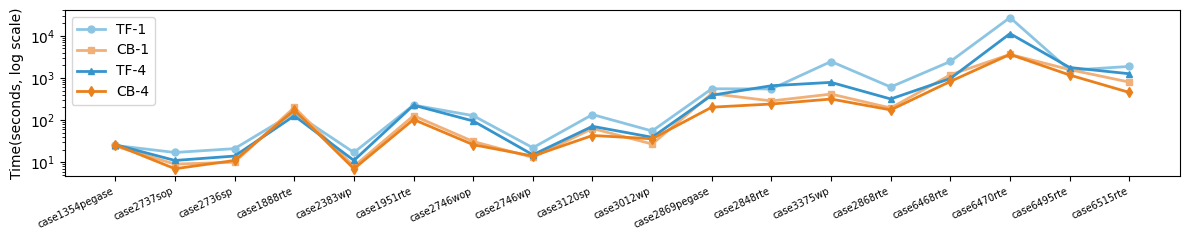

In [34]:
# plot the time results, y-axis as uc_time and full_cb_time, instances as x-axis

import matplotlib.pyplot as plt

df_tmp_1 = ablation_results_1.reset_index()
df_tmp_4 = ablation_results_4.reset_index()
# colors = [
#     '#A1C9F4', # Muted Blue
#     '#8DE5A1', # Muted Green
#     '#FF9F9B', # Muted Red
#     '#D0BBFF'  # Muted Purple
# ]
colors = [
    '#8cc5e3', # light red
    '#f0b077', # light green
    '#3594cc', # dark red
    '#ea801c'# med green
]
plt.figure(figsize=(12, 2.5))
plt.plot(df_tmp_1['instance'], df_tmp_1['uc_time'], label='TF-1', color=colors[0], linewidth=2, marker='o', markersize=5)
plt.plot(df_tmp_1['instance'], df_tmp_1['full_cb_time'], label='CB-1', color=colors[1], linewidth=2, marker='s', markersize=5)
plt.plot(df_tmp_4['instance'], df_tmp_4['uc_time'], label='TF-4', color=colors[2], linewidth=2, marker='^', markersize=5)
plt.plot(df_tmp_4['instance'], df_tmp_4['full_cb_time'], label='CB-4', color=colors[3], linewidth=2, marker='d', markersize=5)
plt.legend()
plt.xticks(rotation=25, ha='right', fontsize=7)
plt.yscale('log')
# plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Time(seconds, log scale)')#, fontweight='bold')
plt.tight_layout()
plt.savefig("ablation_cb.pdf", bbox_inches='tight')
plt.show()

## ablation - decomposition

In [28]:
file_name_decom_no_cb_1 = 'res_an_no_cb_threads_1_nthreads_1.txt'
file_name_uc_1 = 'res_uc_threads_1_nthreads_1.txt'
file_name_decom_no_cb_4 = 'res_an_no_cb_threads_4_nthreads_4.txt'
file_name_uc_4 = 'res_uc_threads_4_nthreads_4.txt'

# file_name_decom_no_cb_1 = file_name_decom_no_cb_4
# file_name_uc_1 = file_name_uc_4

In [29]:
def handle_rh_time(file_name):
    df = read_result(file_name)
    df = df.pivot(index='instance', columns='method', values='time')
    df.reset_index(inplace=True)
    df.columns.name = None
    df.columns = ['instance'] + [col.replace(' ', '_') for col in df.columns[1:]]
    df = df[['instance', 'start', 'improve']]
    df.set_index('instance', inplace=True)
    df.columns = ['start_time', 'improve_time']
    df['total_time'] = df['start_time'] + df['improve_time']
    return df

In [30]:
df_decom_no_cb_1 = handle_rh_time(file_name_decom_no_cb_1)
df_uc_1 = handle_uc(file_name_uc_1)
df_decom_no_cb_4 = handle_rh_time(file_name_decom_no_cb_4)
df_uc_4 = handle_uc(file_name_uc_4)
# df_decom_no_cb_1 = df_decom_no_cb_1.loc[df_uc_1.index] # make sure the order is the same
instances = df_decom_no_cb_1.index.to_list()
df_uc_1 = df_uc_1.loc[instances]
df_decom_no_cb_4 = df_decom_no_cb_4.loc[instances] # make sure the order is the same
df_uc_4 = df_uc_4.loc[instances] # make sure the order is the same


In [31]:
df_decom_no_cb_4.head()

,start_time,improve_time,total_time
instance,,,
case1354pegase,18,10,28
case1888rte,36,15,51
case1951rte,26,9,35
case2383wp,12,6,18
case2736sp,11,8,19


In [32]:
df_uc_4.head()

,uc_time,uc_obj
instance,,
case1354pegase,26,1.575281
case1888rte,126,2.345385
case1951rte,225,2.494229
case2383wp,11,1.368804
case2736sp,14,0.961879


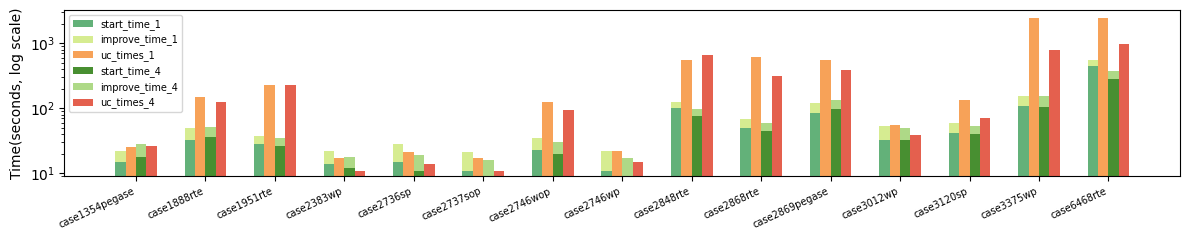

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# --- Plotting Code ---
colors = {
    'start_times_1': '#63b179',
    'improve_times_1': '#d6ec91',
    'uc_times_1': '#f7a258',
    'start_times_4': '#488f31',
    'improve_times_4': '#aed987',
    'uc_times_4': '#e4604e',
}

start_times_1 = df_decom_no_cb_1['start_time']
improve_times_1 = df_decom_no_cb_1['improve_time']
uc_times_1 = df_uc_1['uc_time']

start_times_4 = df_decom_no_cb_4['start_time']
improve_times_4 = df_decom_no_cb_4['improve_time']
uc_times_4 = df_uc_4['uc_time']


# --- Bar Positioning ---
x = np.arange(len(df_uc_1.index.tolist()))  # the label locations (center of the group)
width = 0.15  # the width of EACH bar (needs to be smaller to fit 4)
num_bars = 4 # Total bars per group

# Calculate positions for each bar relative to the center 'x'
pos1 = x - 1.5 * width # Position for stacked bar
pos2 = x - 0.5 * width # Position for baseline bar
pos3 = x + 0.5 * width # Position for new bar 1
pos4 = x + 1.5 * width # Position for new bar 2

# Create the plot
fig, ax = plt.subplots(figsize=(12, 2.5)) # Increase figure size for more bars

# --- Plot the Bars ---
# 1. Stacked Bar (start_time + improve_time) - First position
rects1_base = ax.bar(pos1, start_times_1, width, label='start_time_1', color=colors['start_times_1']) # Specify color if needed
rects1_impr = ax.bar(pos1, improve_times_1, width, bottom=start_times_1, label='improve_time_1', color=colors['improve_times_1']) # Specify color if needed

# 2. Baseline Bar - Second position
rects2 = ax.bar(pos2, uc_times_1, width, label='uc_times_1', color=colors['uc_times_1']) # Specify color if needed

# 3. New Bar 1 - Third position
rects1_base = ax.bar(pos3, start_times_4, width, label='start_time_4', color=colors['start_times_4']) # Specify color if needed
rects1_impr = ax.bar(pos3, improve_times_4, width, bottom=start_times_4, label='improve_time_4', color=colors['improve_times_4']) # Specify color if needed
# 4. New Bar 2 - Fourth position
rects4 = ax.bar(pos4, uc_times_4, width, label='uc_times_4', color=colors['uc_times_4']) # Specify color if needed


# --- Customize the plot ---
ax.set_ylabel('Time(seconds, log scale)')
# ax.set_title('Grouped & Stacked Time Comparison by Instance')
ax.set_xticks(x) # Position the labels at the center of the groups
ax.set_xticklabels(instances) # Rotate labels for better readability
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Move legend outside plot if crowded
ax.legend(fontsize=7)
# Rotate x-axis labels
plt.xticks(rotation=25, ha='right', fontsize=7)
plt.yscale('log') # Set y-axis to log scale
fig.tight_layout() # Adjust layout (might need manual adjustments still)
plt.savefig("ablation_decom.pdf", bbox_inches='tight')
plt.show()

# line graph

In [14]:
# number of instances 
# plot the results, x-axis is the instance name, y-axis is the time
import matplotlib.pyplot as plt
import seaborn as sns


results2 = pd.merge(df_td, df_uc, left_index=True, right_index=True)
results2 = pd.merge(results2, df_rh, left_index=True, right_index=True)
results2.reset_index(inplace=True)
results2.head()

,instance,td_time,td_obj,uc_time,uc_obj,start_time,start_obj,improve_time,improve_obj,total_time
0,case1354pegase,16,1.615070,26,1.575281,13,1.587104,11,1.584653,24
1,case2737sop,19,0.893362,11,0.846974,7,0.858951,8,0.851754,15
2,case2736sp,21,0.993996,14,0.961879,9,0.971862,13,0.966463,22
3,case1888rte,30,2.390904,126,2.345385,29,2.356147,24,2.350612,53
4,case2383wp,23,1.380347,11,1.368804,9,1.374566,15,1.373248,24


Text(0, 0.5, 'Objective Value')

<Figure size 2000x1000 with 0 Axes>

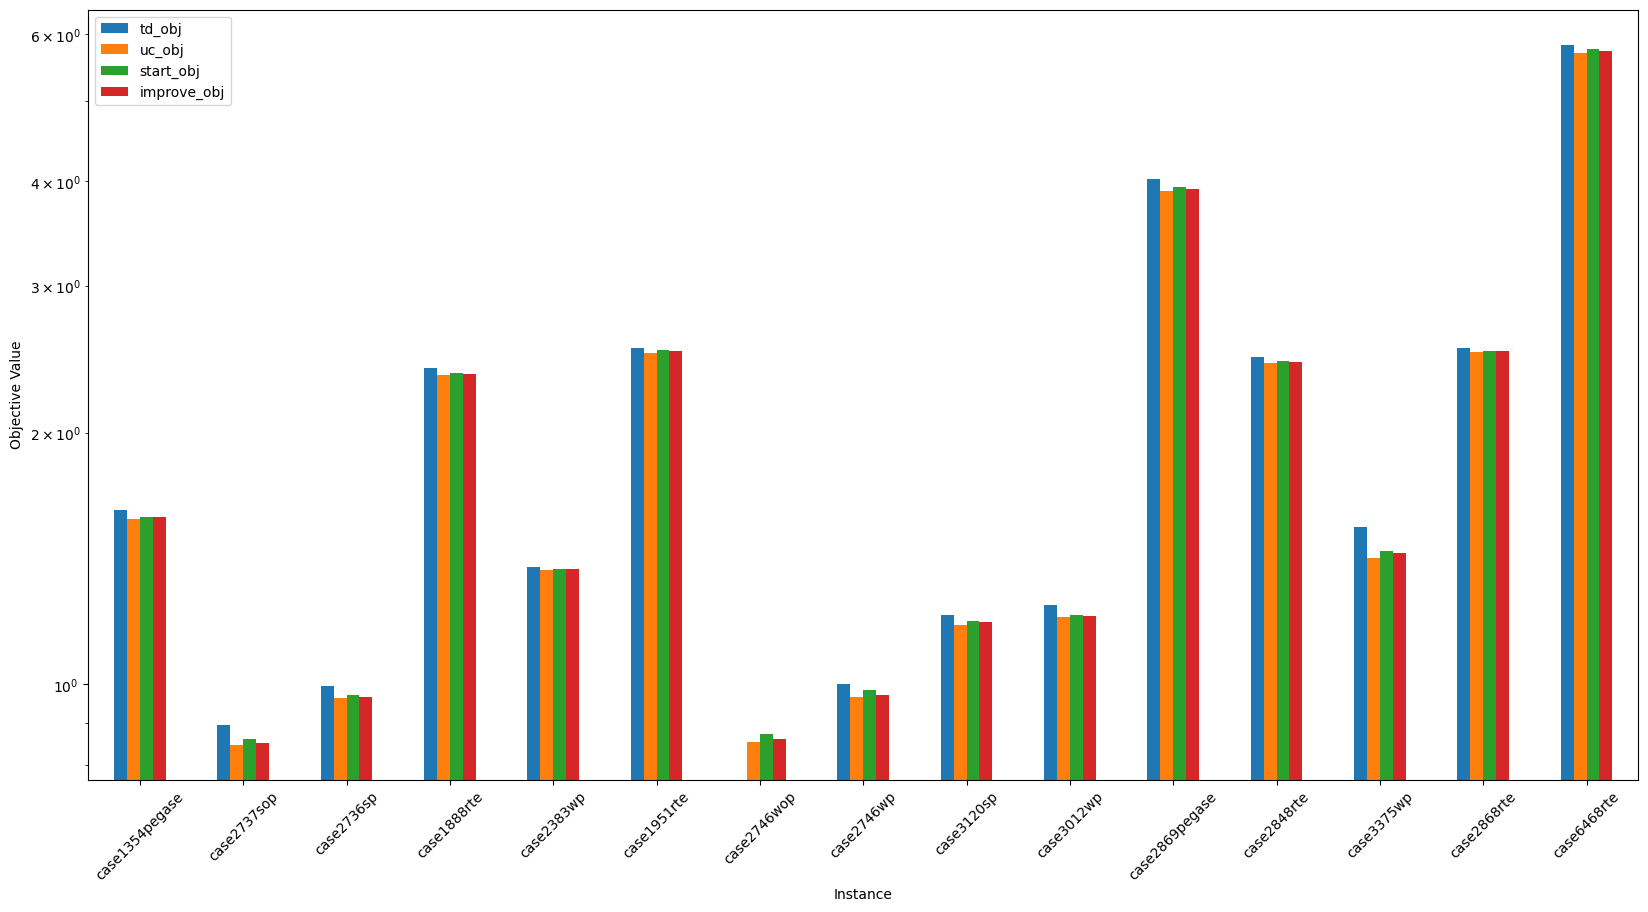

In [25]:
# plot the results, x-axis is the instance name, y-axis is the time
plt.figure(figsize=(20, 10))
results2.plot(x='instance', y=['td_obj', 'uc_obj', 'start_obj', 'improve_obj'], kind='bar', figsize=(20, 10))
plt.xticks(rotation=45)
# set y-scale to be log10
plt.yscale('log')
plt.xlabel('Instance')
plt.ylabel('Objective Value')